In [ ]:
Here is presented the data undertanding of the raw data, for each table that confroms the final dataset

In [ ]:
For this project there are used 3 databases: 
MIMIC-IV v2.2: Contains the demographic information about patients
MIMIC-CXR-JPG v2.0.0: Contains the paths for the CXRs, along with the labels and metadata describing them
CheXmask Database v0.4: Contains the segmentation masks and metadata.

Observaciones:
*The race information for each patient is only available in the admissions table.
*Age and gender information is found in the patients table.
*Label (pathology) information is located in the file -> mimic-cxr-2.0.0-chexpert.csv
*CXR metadata is in -> mimic-cxr-2.0.0-metadata.csv
*Las segmentations masks -> chexmask-cxr-segmentation-data

Locations: 
base path: /mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files

labels: /mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-chexpert.csv
metadata: /mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-metadata.csv
admissions: /mnt/NAS3/datasets/external/MIMIC_ICU/physionet.org/files/mimiciv/2.2/hosp/admissions.csv.gz
patients: /mnt/NAS3/datasets/external/MIMIC_ICU/physionet.org/files/mimiciv/2.2/hosp/patients.csv.gz
masks: /mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/chexmask-cxr-segmentation-data/0.4/OriginalResolution/MIMIC-CXR-JPG.csv

Original data physionet:
MIMIC-IV v2.2:https: https://physionet.org/content/mimiciv/2.2/
MIMIC-CXR-JPG v2.0.0: https://physionet.org/content/mimic-cxr-jpg/2.0.0/ 
CheXmask Database v0.4: https://physionet.org/content/chexmask-cxr-segmentation-data/0.4/ 

In [58]:
import pandas as pd
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
base_path = Path("/mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/mimic-cxr-jpg/2.0.0") #MIMIC CXR
base_path2 = Path("/mnt/NAS3/datasets/external/MIMIC_ICU/physionet.org/files/mimiciv/2.2/hosp") #MIMIC IV
base_path3 = Path ("/mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/chexmask-cxr-segmentation-data/0.4/OriginalResolution/") #MIMIC CheXmask

In [ ]:
#-----------------patients information -> MIMIC IV--------------------

In [ ]:
#plotting functions

In [81]:
def plot_continuous_histograms(df, variables, bins=30):
    """
    Plot histograms for specified continuous variables in a dataframe.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data
    variables (list): List of column names to create histograms for
    bins (int): Number of bins for the histograms (default is 30)
    figsize (tuple): Figure size (width, height) in inches
    
    Returns:
    None (displays the plots)
    """
    # Set up the matplotlib figure
    fig, axes = plt.subplots(len(variables), 1, figsize=(15, 5*len(variables)))
    #fig.suptitle("Histograms of Continuous Variables", fontsize=16)
    
    # Ensure axes is always a 1D array
    if len(variables) == 1:
        axes = [axes]
    
    # Create a histogram for each variable
    for ax, var in zip(axes, variables):
        # Calculate statistics
        mean = df[var].mean()
        median = df[var].median()
        sd = df[var].std()
        
        # Create the histogram
        sns.histplot(data=df, x=var, bins=bins, kde=True, ax=ax)
        
        # Set title with mean and SD
        ax.set_title(f'Distribution of {var}\nMean: {mean:.2f}, SD: {sd:.2f}')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')
        
        # Add mean and median lines
        ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
        ax.axvline(median, color='g', linestyle='-.', label=f'Median: {median:.2f}')
        
        # Add text annotations for mean and SD
        ax.text(0.98, 0.82, f'Mean: {mean:.2f}\nSD: {sd:.2f}', 
                verticalalignment='top', horizontalalignment='right',
                transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        
        # Add legend
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [124]:
def generate_Bar_plots(df, variables, titles=None):
    """
    Generate bar plots for specified categorical variables in a dataframe.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data
    variables (list): List of column names to create bar plots for
    titles (list): Optional list of custom titles for each subplot
    
    Returns:
    None (displays the plots)
    """
    import matplotlib.pyplot as plt
    
    # Calculate the number of rows and columns for the subplots
    n_plots = len(variables)
    n_cols = 2  
    n_rows = (n_plots - 1) // n_cols + 1
    
    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    fig.suptitle("Bar Plots for Categorical Variables", fontsize=16)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    for i, var in enumerate(variables):
        counts = df[var].value_counts()
        
        # Create the bar plot
        axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
        
        # Use custom title or default to variable name
        if titles and len(titles) > i:
            axes[i].set_title(titles[i])
        else:
            axes[i].set_title(var)
        
        axes[i].set_ylabel("Counts")
        axes[i].set_xticks(range(len(counts.index)))
        axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [122]:
def generate_Pie_plots(df, variables, titles=None):
    """
    Generate pie plots for specified categorical variables in a dataframe.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data
    variables (list): List of column names to create pie plots for
    titles (list): List of custom titles for each plot (optional)
    
    Returns:
    None (displays the plots)
    """
    import matplotlib.pyplot as plt
    
    # Calculate the number of rows and columns for the subplots
    n_plots = len(variables)
    n_cols = 2  
    n_rows = (n_plots - 1) // n_cols + 1
    
    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    fig.suptitle("Pie plot Counts", fontsize=16)
    
    # Flatten axes for indexing
    axes = axes.flatten()
    
    for i, var in enumerate(variables):
        counts = df[var].value_counts()
        
        # Create the pie plot
        axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
        
        # Use custom title if provided; otherwise default to the variable name
        if titles and len(titles) > i:
            axes[i].set_title(titles[i])
        else:
            axes[i].set_title(var)
    
    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


In [ ]:
#plotting functions

In [ ]:
#------- hosp/patients -> sex - age information

In [53]:
path_p = base_path2 / "patients.csv.gz"
patients_df = pd.read_csv(path_p, compression='gzip')

patients_df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [97]:
patients_df.shape

(299712, 6)

In [210]:
patients_df.isna().sum()

subject_id                0
gender                    0
anchor_age                0
anchor_year               0
anchor_year_group         0
dod                  270636
dtype: int64

In [59]:
patients_df.describe()

,subject_id,anchor_age,anchor_year
count,2.997120e+05,299712.000000,299712.000000
mean,1.500885e+07,48.539888,2151.124056
std,2.885019e+06,20.895650,23.464598
min,1.000003e+07,18.000000,2110.000000
25%,1.250796e+07,29.000000,2131.000000
50%,1.501416e+07,48.000000,2151.000000
75%,1.750489e+07,65.000000,2171.000000
max,1.999999e+07,91.000000,2208.000000


In [ ]:
#------- hosp/admissions -> race information

In [54]:
path_admi = base_path2 / "admissions.csv.gz"

admissions_df = pd.read_csv(path_admi , compression='gzip')
admissions_df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [98]:
admissions_df.shape

(431231, 16)

In [211]:
admissions_df.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
dtype: int64

In [107]:
race_df=admissions_df[["subject_id", "race"]]
race_df = race_df.drop_duplicates(subset=["subject_id"])

race_df.head()

,subject_id,race
0,10000032,WHITE
4,10000068,WHITE
5,10000084,WHITE
7,10000108,WHITE
8,10000117,WHITE


In [108]:
race_df.shape

(180733, 2)

In [ ]:
#merge to obtain 1 df with all demographic atttibutes

In [109]:
demo_df = patients_df.merge(race_df, on="subject_id", how="inner")

In [110]:
demo_df.shape

(180733, 7)

In [111]:
demo_df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,race
0,10000032,F,52,2180,2014 - 2016,2180-09-09,WHITE
1,10000068,F,19,2160,2008 - 2010,NaN,WHITE
2,10000084,M,72,2160,2017 - 2019,2161-02-13,WHITE
3,10000108,M,25,2163,2014 - 2016,NaN,WHITE
4,10000117,F,48,2174,2008 - 2010,NaN,WHITE


In [112]:
demo_df.describe()

,subject_id,anchor_age,anchor_year
count,1.807330e+05,180733.000000,180733.000000
mean,1.501311e+07,55.376373,2151.498653
std,2.884720e+06,20.270201,23.523041
min,1.000003e+07,18.000000,2110.000000
25%,1.250868e+07,39.000000,2131.000000
50%,1.502081e+07,57.000000,2151.000000
75%,1.751153e+07,71.000000,2172.000000
max,1.999999e+07,91.000000,2208.000000


In [113]:
#Age histogram

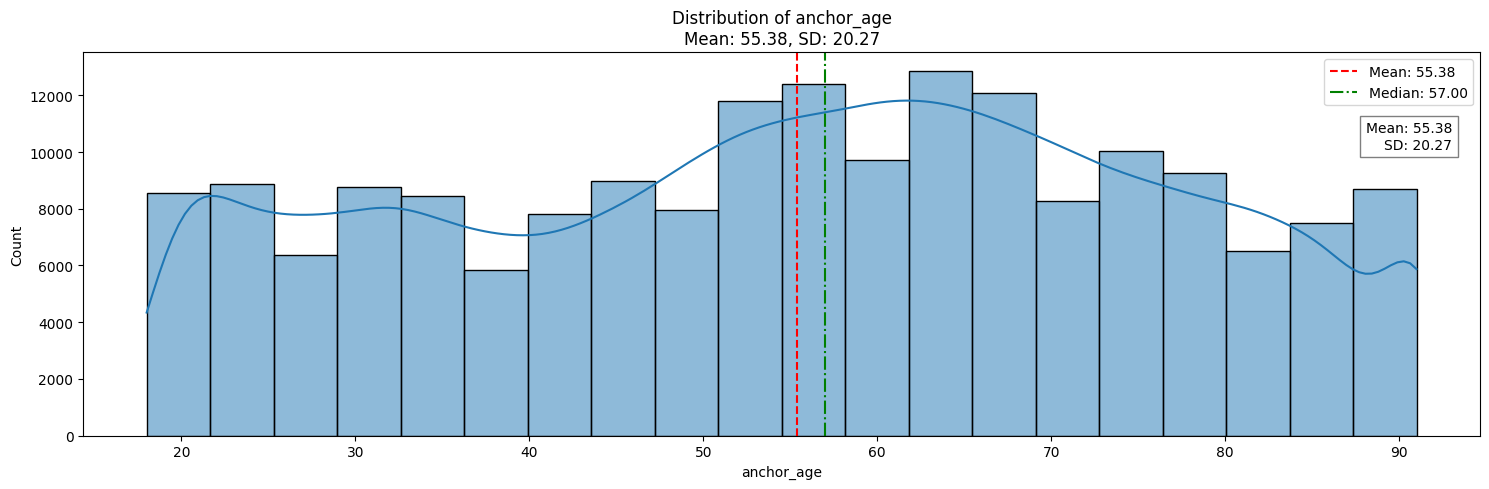

In [117]:
plot_continuous_histograms(demo_df, ['anchor_age'], bins=20)

In [ ]:
#counts of sex and race

In [118]:
demo_df['gender'].value_counts()

gender
F    95729
M    85004
Name: count, dtype: int64

In [119]:
demo_df['race'].value_counts()

race
WHITE                                        115010
BLACK/AFRICAN AMERICAN                        19304
UNKNOWN                                        8056
OTHER                                          7475
ASIAN                                          3475
WHITE - OTHER EUROPEAN                         3204
HISPANIC OR LATINO                             3114
HISPANIC/LATINO - PUERTO RICAN                 2759
ASIAN - CHINESE                                2561
BLACK/CAPE VERDEAN                             1886
HISPANIC/LATINO - DOMINICAN                    1769
WHITE - RUSSIAN                                1639
BLACK/AFRICAN                                  1143
UNABLE TO OBTAIN                               1077
BLACK/CARIBBEAN ISLAND                         1076
PATIENT DECLINED TO ANSWER                      971
ASIAN - SOUTH EAST ASIAN                        636
ASIAN - ASIAN INDIAN                            582
HISPANIC/LATINO - GUATEMALAN                    564
WHITE -

In [ ]:
#pie plot of sex and race/etchnicity

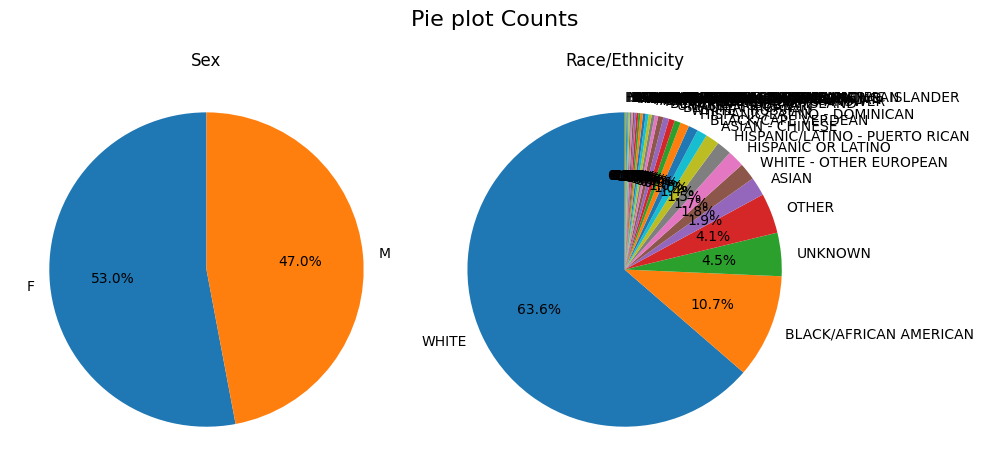

In [123]:
generate_Pie_plots(demo_df, ['gender','race'], ['Sex','Race/Ethnicity'] )

In [ ]:
#bar plot of sex and race/etchnicity

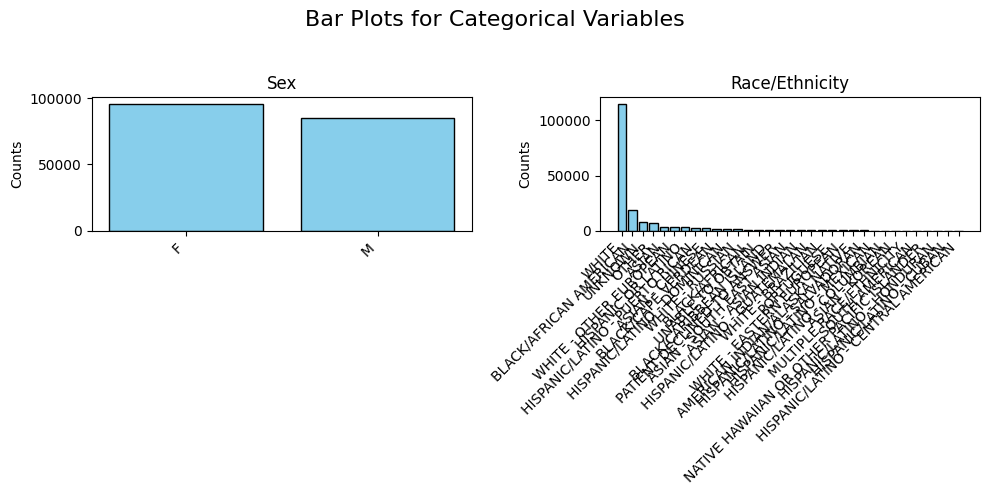

In [126]:
generate_Bar_plots(demo_df,['gender','race'], ['Sex','Race/Ethnicity'])

In [ ]:
#interseccional analysis 

In [130]:
pd.crosstab(demo_df['race'], demo_df['gender'])

gender,F,M
race,,
AMERICAN INDIAN/ALASKA NATIVE,203,174
ASIAN,2089,1386
ASIAN - ASIAN INDIAN,310,272
ASIAN - CHINESE,1501,1060
ASIAN - KOREAN,172,96
ASIAN - SOUTH EAST ASIAN,359,277
BLACK/AFRICAN,631,512
BLACK/AFRICAN AMERICAN,12033,7271
BLACK/CAPE VERDEAN,1207,679


<Figure size 1200x600 with 0 Axes>

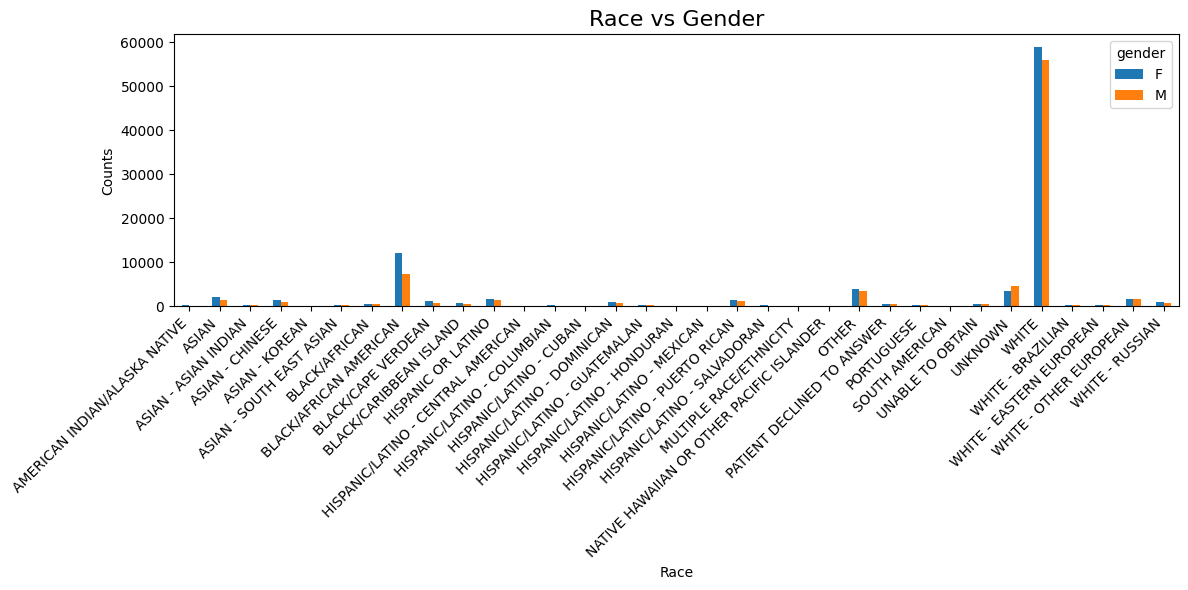

In [137]:
table = pd.crosstab(demo_df['race'], demo_df['gender'])

plt.figure(figsize=(12, 6))     
table.plot(kind='bar', figsize=(12, 6))  

plt.ylabel("Counts")
plt.xlabel("Race")
plt.title("Race vs Gender", fontsize=16)

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()                   
plt.show()


In [ ]:
#reduce race for visual clarity

In [ ]:
#Due to the Race/Ethnicity attribute is divided in 33 categories, for visual clarity, Race/Ethnicity categories with fewer than 500 patients
#were grouped into an “Other” category. Additionally, the categories “Unknown,” “Unable to obtain,” and “Patient declined to answer” were 
#consolidated under the label “Unable to obtain.”

In [152]:
df_race_clean=demo_df.copy()
df_race_clean['race_clean'] = df_race_clean['race'].replace({
    'UNKNOWN': 'UNABLE TO OBTAIN',
    'PATIENT DECLINED TO ANSWER': 'UNABLE TO OBTAIN'
})

counts = df_race_clean['race_clean'].value_counts()

#threshold-> 1000 samples
minor_categories = counts[counts < 1000].index.tolist()

df_race_clean['race_clean'] = df_race_clean['race_clean'].apply(
    lambda x: 'OTHER' if x in minor_categories else x
)

df_race_clean['race_clean'].value_counts()

race_clean
WHITE                             115010
BLACK/AFRICAN AMERICAN             19304
OTHER                              13689
UNABLE TO OBTAIN                   10104
ASIAN                               3475
WHITE - OTHER EUROPEAN              3204
HISPANIC OR LATINO                  3114
HISPANIC/LATINO - PUERTO RICAN      2759
ASIAN - CHINESE                     2561
BLACK/CAPE VERDEAN                  1886
HISPANIC/LATINO - DOMINICAN         1769
WHITE - RUSSIAN                     1639
BLACK/AFRICAN                       1143
BLACK/CARIBBEAN ISLAND              1076
Name: count, dtype: int64

In [170]:
df_race_clean.shape

(180733, 9)

In [153]:
df_race_clean.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,race,race_grouped,race_clean
0,10000032,F,52,2180,2014 - 2016,2180-09-09,WHITE,WHITE,WHITE
1,10000068,F,19,2160,2008 - 2010,NaN,WHITE,WHITE,WHITE
2,10000084,M,72,2160,2017 - 2019,2161-02-13,WHITE,WHITE,WHITE
3,10000108,M,25,2163,2014 - 2016,NaN,WHITE,WHITE,WHITE
4,10000117,F,48,2174,2008 - 2010,NaN,WHITE,WHITE,WHITE


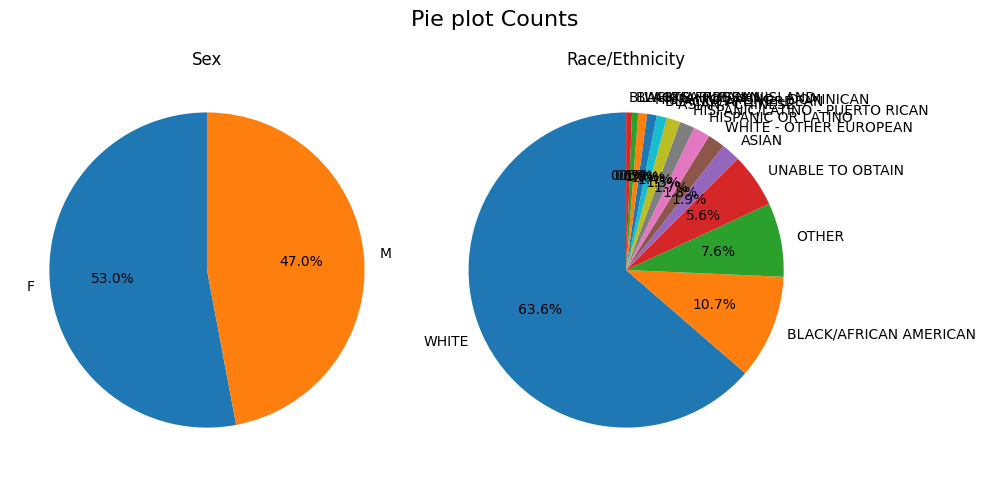

In [155]:
generate_Pie_plots(df_race_clean, ['gender','race_clean'], ['Sex','Race/Ethnicity'] )

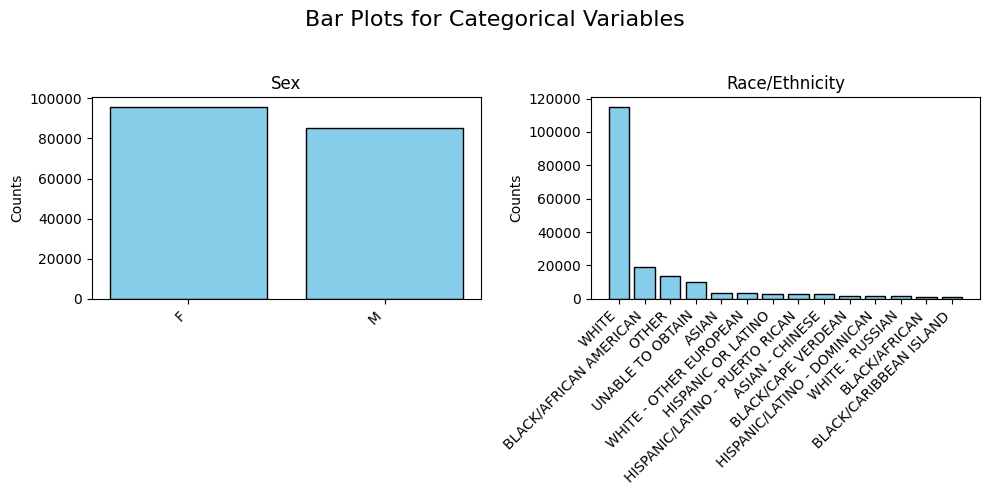

In [160]:
generate_Bar_plots(df_race_clean,['gender','race_clean'], ['Sex','Race/Ethnicity'])

In [157]:
df_race_clean['gender'].value_counts()


gender
F    95729
M    85004
Name: count, dtype: int64

In [159]:
pd.crosstab(df_race_clean['race_clean'], df_race_clean['gender'])

gender,F,M
race_clean,,
ASIAN,2089,1386
ASIAN - CHINESE,1501,1060
BLACK/AFRICAN,631,512
BLACK/AFRICAN AMERICAN,12033,7271
BLACK/CAPE VERDEAN,1207,679
BLACK/CARIBBEAN ISLAND,649,427
HISPANIC OR LATINO,1697,1417
HISPANIC/LATINO - DOMINICAN,1080,689
HISPANIC/LATINO - PUERTO RICAN,1459,1300


<Figure size 1200x600 with 0 Axes>

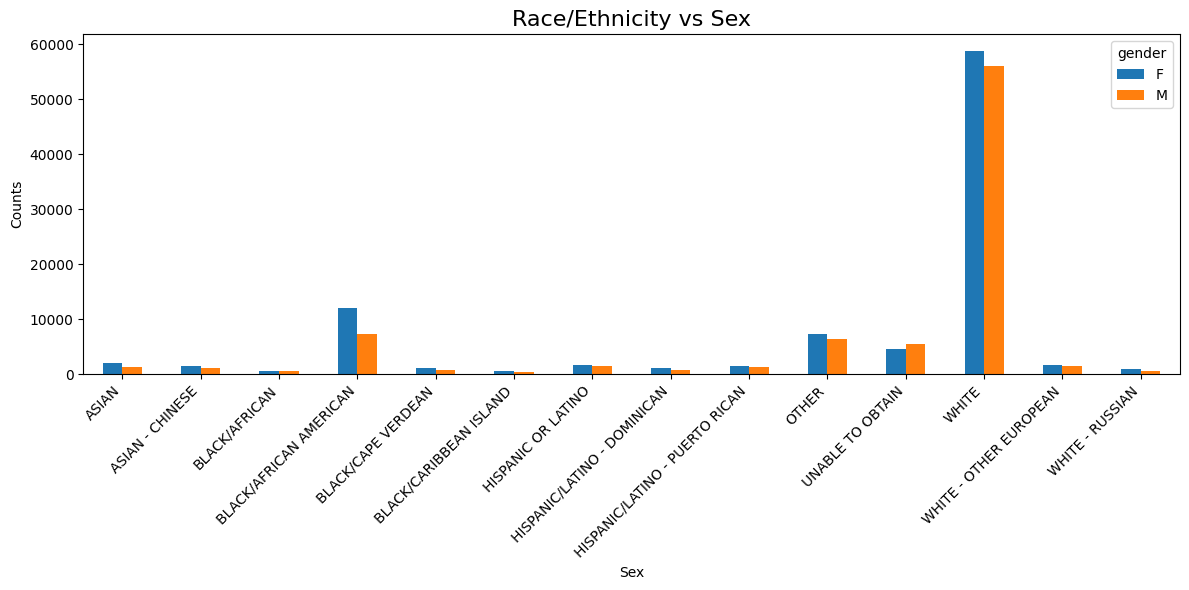

In [163]:
table = pd.crosstab(df_race_clean['race_clean'], df_race_clean['gender'])

plt.figure(figsize=(12, 6))     
table.plot(kind='bar', figsize=(12, 6))  

plt.ylabel("Counts")
plt.xlabel("Sex")
plt.title("Race/Ethnicity vs Sex", fontsize=16)

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()                  
plt.show()


In [ ]:
#-----------------patients information -> MIMIC IV--------------------

In [ ]:
#--------INFO -> MIMIC-CXR-----------------

In [5]:
#info mimic
readme_path = base_path / "README"
with open(readme_path, 'r') as file:
    readme_content = file.read()

print(readme_content)

# MIMIC-CXR-JPG v2.0.0

The MIMIC Chest X-ray JPG (MIMIC-CXR-JPG) Database v2.0.0 is a large publicly available dataset of chest radiographs in JPG format with structured labels derived from free-text radiology reports. The MIMIC-CXR-JPG dataset is wholly derived from MIMIC-CXR, providing JPG format files derived from the DICOM images and structured labels derived from the free-text reports. The aim of MIMIC-CXR-JPG is to provide a convenient processed version of MIMIC-CXR, as well as to provide a standard reference for data splits and image labels. The dataset contains 377,110 JPG format images and structured labels derived from the 227,827 free-text radiology reports associated with these images. The dataset is de-identified to satisfy the US Health Insurance Portability and Accountability Act of 1996 (HIPAA) Safe Harbor requirements. Protected health information (PHI) has been removed. The dataset is intended to support a wide body of research in medicine including image understandi

In [ ]:
#-------structured label information. Unique id: study_id ->  mimic-cxr-2.0.0-chexpert-> MIMIC CXR--------

In [9]:
path_labels = base_path / "mimic-cxr-2.0.0-chexpert.csv"
labels_df = pd.read_csv(path_labels)
labels_df.head(15)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
5,10000898,50771383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,10000898,54205396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,10000935,50578979,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,1.0,NaN,NaN
8,10000935,51178377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN
9,10000935,55697293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [164]:
labels_df.shape

(227827, 16)

In [34]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227827 entries, 0 to 227826
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   subject_id                  227827 non-null  int64  
 1   study_id                    227827 non-null  int64  
 2   Atelectasis                 57666 non-null   float64
 3   Cardiomegaly                66799 non-null   float64
 4   Consolidation               23076 non-null   float64
 5   Edema                       65833 non-null   float64
 6   Enlarged Cardiomediastinum  21837 non-null   float64
 7   Fracture                    5831 non-null    float64
 8   Lung Lesion                 8287 non-null    float64
 9   Lung Opacity                58425 non-null   float64
 10  No Finding                  75455 non-null   float64
 11  Pleural Effusion            87272 non-null   float64
 12  Pleural Other               2902 non-null    float64
 13  Pneumonia     

In [ ]:
# Number of unique study_id values

In [16]:
unique_studies=labels_df.study_id.nunique()
print(f'Number of unique study_id values:  {unique_studies}')

Number of unique study_id values:  227827


In [ ]:
# Number of unique subject_id values

In [166]:
unique_subjects=labels_df.subject_id.nunique()
print(f'Number of unique subject_id values:  {unique_subjects}')

Number of unique subject_id values:  65379


In [32]:
labels_df.duplicated(subset=['subject_id', 'study_id']).sum()

0

In [ ]:
#PATHOLOGIES

In [36]:
df_pathologies['No Finding'].value_counts(dropna=False)

No Finding
NaN    152372
1.0     75455
Name: count, dtype: int64

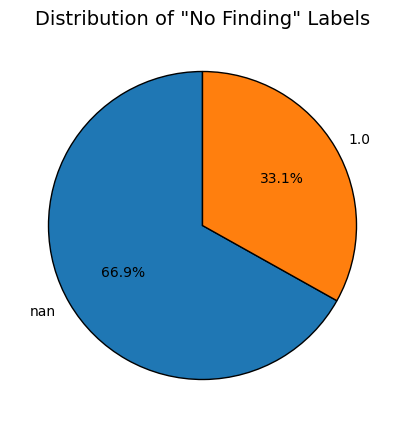

In [167]:
values = df_pathologies['No Finding'].value_counts(dropna=False)
labels = values.index.astype(str)  

plt.figure(figsize=(5,5))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of "No Finding" Labels', fontsize=14)
plt.show()


In [47]:
#Filter only the studies with "No Finding" equal to 1.0
no_finding_pos = df_pathologies[df_pathologies['No Finding'] == 1.0]

pathology_cols = [
    col for col in df_pathologies.columns
    if col not in ['subject_id', 'study_id', 'No Finding', 'Support Devices']
]

#Filter studies that also have a 1.0 in any other pathology
inconsistent_mask = (no_finding_pos[pathology_cols] == 1.0).any(axis=1)

#Count how many studies are inconsistent
inconsistent_cases = inconsistent_mask.sum()

print(f'Number of studies with "No Finding" = 1.0 but with another positive pathology (excluding Support Devices): {inconsistent_cases}')


Number of studies with "No Finding" = 1.0 but with another positive pathology (excluding Support Devices): 0


In [20]:
df_pathologies = labels_df.drop(columns=['subject_id', 'study_id'])
df_pathologies.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


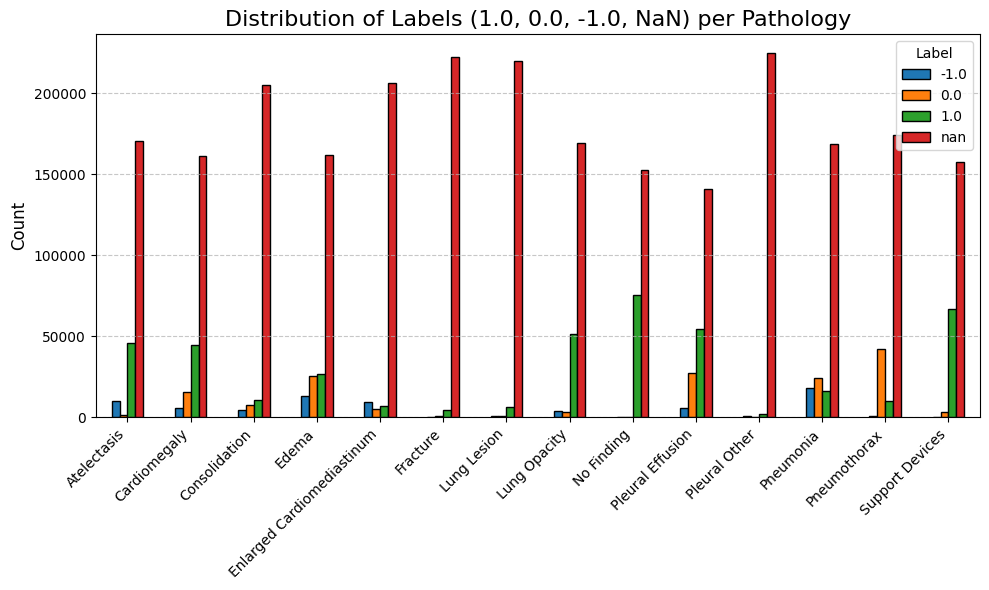

In [168]:
label_dist = df_pathologies.apply(lambda col: col.value_counts(dropna=False))
label_dist = label_dist.fillna(0)

label_dist.T.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title('Distribution of Labels (1.0, 0.0, -1.0, NaN) per Pathology', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#pathologies correlations

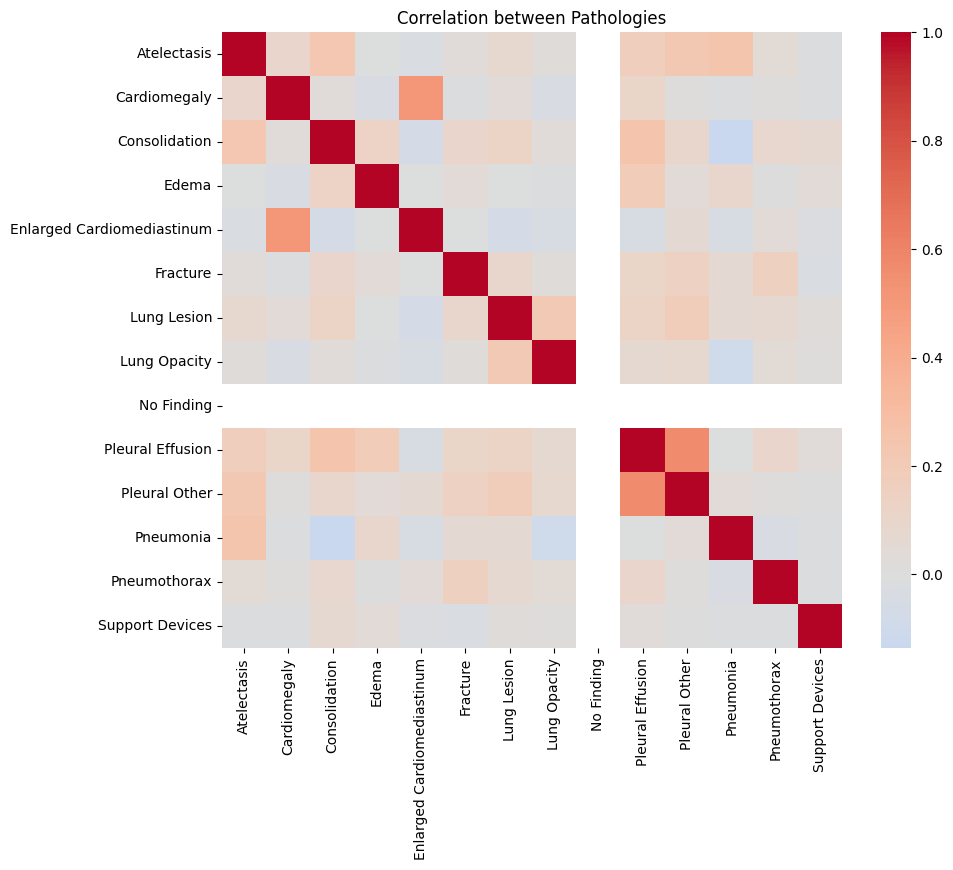

In [51]:
corr = df_pathologies.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation between Pathologies')
plt.show()

In [ ]:
#-------structured label information. Unique id: study_id ->  mimic-cxr-2.0.0-chexpert-> MIMIC CXR--------

In [ ]:
#-------metadata -> dicom_id, CXR paths -> MIMIC CXR ------------

In [52]:
path_meta = base_path / "mimic-cxr-2.0.0-metadata.csv"
metadata_df = pd.read_csv(path_meta)

metadata_df.head(15)

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
5,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,10000032,53911762,CHEST (PORTABLE AP),AP,2906,2258,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,Erect
6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,CHEST (PORTABLE AP),AP,3056,2544,21800805,234424.765,CHEST (PORTABLE AP),antero-posterior,NaN
7,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,10000764,57375967,CHEST (PA AND LAT),AP,2544,3056,21321015,84047.984,CHEST (PA AND LAT),antero-posterior,Erect
8,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,10000764,57375967,CHEST (PA AND LAT),LATERAL,3056,2544,21321015,84047.984,CHEST (PA AND LAT),lateral,Erect
9,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,10000764,57375967,CHEST (PA AND LAT),LATERAL,3056,2544,21321015,84047.984,CHEST (PA AND LAT),lateral,Erect


In [169]:
metadata_df.shape

(377110, 12)

In [209]:
metadata_df.describe()

,subject_id,study_id,Rows,Columns,StudyDate,StudyTime
count,3.771100e+05,3.771100e+05,377110.000000,377110.000000,3.771100e+05,377110.000000
mean,1.500806e+07,5.500557e+07,2695.528310,2485.837411,2.157359e+07,129744.645843
std,2.879640e+06,2.886680e+06,429.019841,408.512273,2.400854e+05,57489.613287
min,1.000003e+07,5.000001e+07,697.000000,776.000000,2.110011e+07,0.187000
25%,1.250332e+07,5.250335e+07,2539.000000,2484.000000,2.137122e+07,93015.925500
50%,1.501928e+07,5.501290e+07,3050.000000,2544.000000,2.157113e+07,133303.491500
75%,1.749247e+07,5.750598e+07,3056.000000,2544.000000,2.177083e+07,171558.718000
max,1.999999e+07,5.999992e+07,4280.000000,4280.000000,2.208121e+07,235959.437000


In [ ]:
#view position analysis

In [176]:
metadata_df['ViewPosition'].value_counts(dropna=False)

ViewPosition
AP                147173
PA                 96161
LATERAL            82853
LL                 35133
NaN                15769
PA LLD                 4
LAO                    3
RAO                    3
AP AXIAL               2
AP LLD                 2
XTABLE LATERAL         2
AP RLD                 2
SWIMMERS               1
PA RLD                 1
LPO                    1
Name: count, dtype: int64

In [177]:
metadata_df['PerformedProcedureStepDescription'].value_counts(dropna=False)

PerformedProcedureStepDescription
CHEST (PA AND LAT)                               180653
CHEST (PORTABLE AP)                              126342
NaN                                               35512
Performed Desc                                    33321
PORTABLE ABDOMEN                                    278
CHEST (SINGLE VIEW)                                 217
CHEST (PA AND LAT) PORT                             213
DX CHEST PORTABLE PICC LINE PLACEMENT               109
CHEST PORT. LINE PLACEMENT                           82
TRAUMA #2 (AP CXR AND PELVIS PORT)                   78
CHEST (SINGLE VIEW) PORT                             60
CHEST (PRE-OP PA AND LAT)                            35
TRAUMA #3 (PORT CHEST ONLY)                          26
ABD PORT LINE/TUBE PLACEMENT 1 EXAM PORT             25
ABDOMEN (SUPINE ONLY) PORT                           15
CHEST (PORTABLE AP) PORT                             12
ABD PORT LINE/TUBE PLACEMENT 1 EXAM                  11
Portable Chest

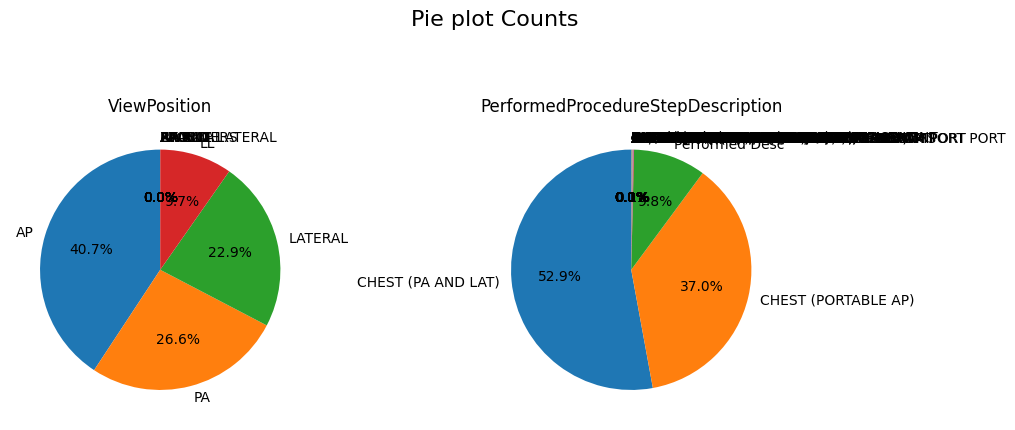

In [175]:
generate_Pie_plots(metadata_df, ['ViewPosition','PerformedProcedureStepDescription'], ['ViewPosition','PerformedProcedureStepDescription'] )

In [ ]:
#View position and PerformedProcedureStepDescription with less than 100 samples were grouped into the "Other" category

In [190]:
metadata_2_df = metadata_df.copy()

def clean_categories(df, col, threshold=500):
    minor = df[col].value_counts()[lambda x: x < threshold].index
    return df[col].apply(lambda x: 'OTHER' if x in minor else x)

metadata_2_df['ViewPosition_clean'] = clean_categories(metadata_2_df, 'ViewPosition')
metadata_2_df['Procedure_clean'] = clean_categories(metadata_2_df, 'PerformedProcedureStepDescription')

In [191]:
metadata_2_df['ViewPosition_clean'].value_counts()

ViewPosition_clean
AP         147173
PA          96161
LATERAL     82853
LL          35133
OTHER          21
Name: count, dtype: int64

In [192]:
metadata_2_df['Procedure_clean'].value_counts()

Procedure_clean
CHEST (PA AND LAT)     180653
CHEST (PORTABLE AP)    126342
Performed Desc          33321
OTHER                    1282
Name: count, dtype: int64

In [188]:
metadata_2_df.shape

(377110, 14)

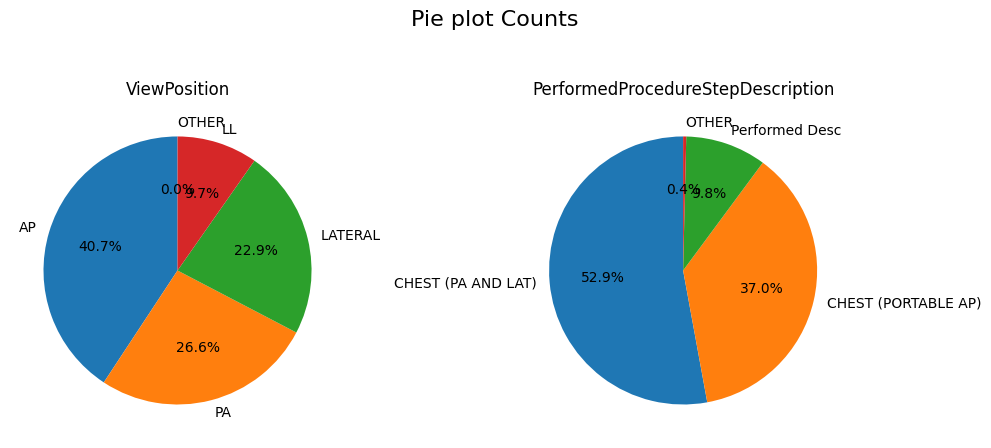

In [193]:
generate_Pie_plots(metadata_2_df, ['ViewPosition_clean','Procedure_clean'], ['ViewPosition','PerformedProcedureStepDescription'] )

In [ ]:
#-------metadata -> dicom_id, CXR paths -> MIMIC CXR ------------

In [ ]:
#-------cxr -> MIMIC CXR ------------

In [196]:
from PIL import Image
import matplotlib.pyplot as plt

In [197]:
def show_image_with_dimensions(image_path):

    img = Image.open(image_path).convert("L")
    
    width, height = img.size
    print(f"Image dimensions: {width} x {height}")

    plt.imshow(img, cmap="gray")
    plt.axis("off") 
    plt.title(f"Size: {width} x {height}")
    plt.show()

In [204]:
labels_df.head(100)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10002428,57887188,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
96,10002428,57961288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0
97,10002428,58581921,NaN,0.0,1.0,0.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN
98,10002428,58601917,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0


In [207]:
#random study: 50414267
path_random_study = base_path / "files/p10/p10000032/s50414267"
cxr_files = os.listdir(path_random_study)
print(cxr_files)

['02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg', '174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg', 'index.html']


Image dimensions: 2544 x 3056


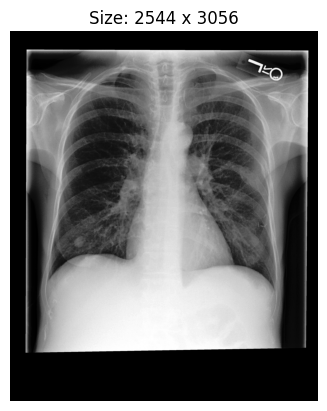

Image dimensions: 2544 x 3056


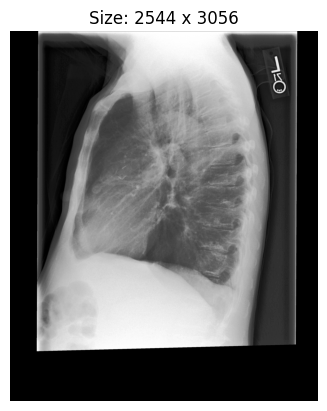

In [208]:
#random study:50414267 
cxr_path_1 = path_random_study / "02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg"
cxr_path_2 = path_random_study / "174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg"
show_image_with_dimensions(cxr_path_1)
show_image_with_dimensions(cxr_path_2)

In [212]:
cxr_1 = metadata_df[metadata_df['dicom_id'] == "02aa804e-bde0afdd-112c0b34-7bc16630-4e384014"]
cxr_1

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect


In [213]:
cxr_2 = metadata_df[metadata_df['dicom_id'] == "174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962"]
cxr_2

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect


In [ ]:
#-------cxr -> MIMIC CXR ------------

In [ ]:
#--------INFO -> MIMIC-CXR-----------------

In [ ]:
#--------------CheXmask Database ------------

In [214]:
path_masks = base_path3 / "MIMIC-CXR-JPG.csv"
mask_df = pd.read_csv(path_masks)

mask_df

,dicom_id,Dice RCA (Mean),Dice RCA (Max),Landmarks,Left Lung,Right Lung,Heart,Height,Width
0,f4a185f1-db2de1fd-a05b274e-21f07d10-63a30841,0.885982,0.910834,[[ 904 433]\n [ 845 441]\n [ 777 489]\n [ 6...,1110713 9 1113242 27 1115772 44 1118301 61 112...,1102454 5 1104990 15 1107527 24 1110064 33 111...,3097284 10 3099821 31 3102358 51 3104896 70 31...,3056,2544
1,1534c820-a44d5232-30d7c596-ca557ed1-ef14d4ae,0.866419,0.928404,[[1143 150]\n [1048 157]\n [ 956 194]\n [ 8...,434219 90 436761 94 439303 99 441844 105 44438...,382738 8 385268 25 387799 41 390329 58 392859 ...,2263031 26 2265529 80 2268048 113 2270590 122 ...,3056,2544
2,95aa18d9-27969db3-9c904c3b-7e6eb3fa-95ee0061,0.884501,0.905510,[[ 929 427]\n [ 863 436]\n [ 794 486]\n [ 7...,935245 4 937785 13 940326 21 942866 30 945407 ...,1087215 4 1089752 13 1092288 23 1094825 32 109...,3249987 98 3252504 133 3255021 169 3257550 192...,3056,2544
3,80321566-1d300fe2-358ad58a-98a6b6d2-d7ad6c3f,0.864541,0.897160,[[ 814 504]\n [ 749 501]\n [ 677 555]\n [ 6...,1298994 15 1301510 45 1304026 75 1306556 91 13...,1275294 11 1277837 34 1280379 58 1282922 70 12...,3674729 16 3677265 47 3679800 79 3682336 144 3...,3056,2544
4,a9a74a32-490cae66-d7a2fd39-cab8a408-858f665b,0.876013,0.908857,[[ 906 480]\n [ 825 492]\n [ 745 552]\n [ 6...,1210021 4 1212560 13 1215099 21 1217639 29 122...,1222024 5 1224561 14 1227099 23 1229636 32 123...,3570563 18 3573081 56 3575599 94 3578128 121 3...,3056,2544
...,...,...,...,...,...,...,...,...,...
243329,21570ef0-ba470921-6e936b78-2e46f17e-31c6cc51,0.862717,0.922274,[[1165 468]\n [1082 479]\n [ 998 519]\n [ 9...,1240741 8 1243271 26 1245801 44 1248331 62 125...,1191755 5 1194291 17 1196828 28 1199364 40 120...,2670135 9 2672670 28 2675205 46 2677740 64 268...,2753,2544
243330,c2714aec-df227cb9-c87c3261-5526f21e-b67883dd,0.873246,0.906061,[[ 955 529]\n [ 870 542]\n [ 788 586]\n [ 7...,1423500 10 1426015 31 1428530 52 1431045 72 14...,1339323 6 1341847 16 1344370 28 1346894 39 134...,2786979 11 2789487 35 2791995 58 2794508 76 27...,2942,2530
243331,d5fd7e0c-5961fd50-cc03a030-723ee3fb-048b7fda,0.868462,0.881600,[[ 968 582]\n [ 898 582]\n [ 830 608]\n [ 7...,1609402 7 1611943 21 1614485 34 1617026 47 161...,1481506 73 1484048 78 1486589 85 1489130 91 14...,2781838 7 2784378 21 2786918 35 2789458 50 279...,3056,2544
243332,1dede0f2-fe40a0db-5fb8d85a-81dbbfc0-5fedf7cf,0.878087,0.890184,[[ 851 592]\n [ 776 598]\n [ 694 637]\n [ 6...,1502530 9 1505058 28 1507586 48 1510114 67 151...,1506894 8 1509426 23 1511957 39 1514489 54 151...,3338909 83 3341448 100 3343987 117 3346526 135...,3056,2544


In [215]:
mask_df.describe()

,Dice RCA (Mean),Dice RCA (Max),Height,Width
count,243334.000000,243334.000000,243334.000000,243334.000000
mean,0.830650,0.872732,2716.448803,2606.426825
std,0.050704,0.049586,377.449182,372.218135
min,0.149124,0.179348,697.000000,776.000000
25%,0.810583,0.854463,2539.000000,2539.000000
50%,0.842107,0.883627,2784.000000,2544.000000
75%,0.863962,0.904249,3056.000000,3050.000000
max,0.920812,0.967694,3056.000000,3056.000000


In [284]:
pd.Series({
    'Below_0.7': (mask_df['Dice RCA (Mean)'] < 0.7).sum(),
    'Above_0.7': (mask_df['Dice RCA (Mean)'] > 0.7).sum(),
})


Below_0.7      5836
Above_0.7    237498
dtype: int64

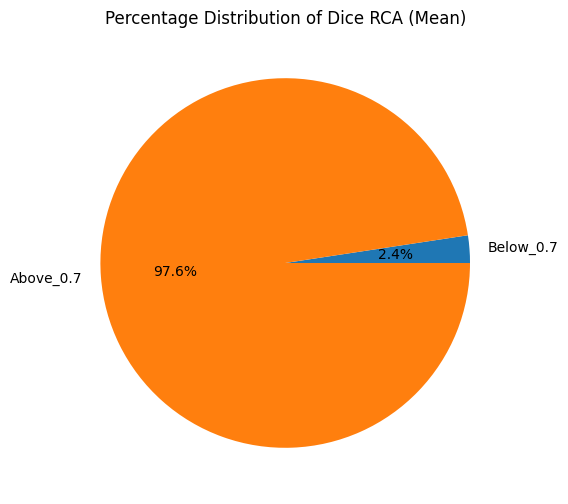

In [283]:
counts = pd.Series({
    'Below_0.7': (mask_df['Dice RCA (Mean)'] < 0.7).sum(),
    'Above_0.7': (mask_df['Dice RCA (Mean)'] > 0.7).sum(),
})

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Dice RCA (Mean)')
plt.show()

In [253]:
merge_meta_mask_df = metadata_df.merge(mask_df, on="dicom_id", how="inner")

In [268]:
samples_meta_mask=merge_meta_mask_df.iloc[:2]
samples_meta_mask

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,Dice RCA (Mean),Dice RCA (Max),Landmarks,Left Lung,Right Lung,Heart,Height,Width
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect,0.896870,0.915153,[[ 986 319]\n [ 893 329]\n [ 795 373]\n [ 7...,792824 6 795358 20 797892 34 800426 48 802960 ...,812519 6 815054 18 817588 30 820123 42 822658 ...,3015910 10 3018442 28 3020973 47 3023504 66 30...,3056,2544
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect,0.849594,0.879080,[[ 983 403]\n [ 894 409]\n [ 801 454]\n [ 7...,1019278 16 1021792 49 1024306 82 1026834 101 1...,1026209 9 1028738 27 1031267 45 1033797 62 103...,3288188 17 3290708 52 3293228 87 3295759 111 3...,3056,2544


In [260]:
print(base_path)

/mnt/NAS3/datasets/external/MIMIC_CXR/physionet.org/files/mimic-cxr-jpg/2.0.0


In [269]:
subject_id = samples_meta_mask['subject_id'].astype(str)
study_id = samples_meta_mask['study_id'].astype(str)
dicom_id = samples_meta_mask['dicom_id'].astype(str)

#'reduced_path', pos 3
samples_meta_mask.insert(3, "path", "")

base_p = str(base_path / "files")
patient_start = "/p" + subject_id.str[:2]  
samples_meta_mask['path'] = (
    base_p + patient_start + "/p" + subject_id + "/s" + study_id + "/" + dicom_id + ".jpg"
)

samples_meta_mask


/tmp/ipykernel_1578990/1816809845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_meta_mask['path'] = (


,dicom_id,subject_id,study_id,path,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,...,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,Dice RCA (Mean),Dice RCA (Max),Landmarks,Left Lung,Right Lung,Heart,Height,Width
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,/mnt/NAS3/datasets/external/MIMIC_CXR/physione...,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,...,postero-anterior,Erect,0.896870,0.915153,[[ 986 319]\n [ 893 329]\n [ 795 373]\n [ 7...,792824 6 795358 20 797892 34 800426 48 802960 ...,812519 6 815054 18 817588 30 820123 42 822658 ...,3015910 10 3018442 28 3020973 47 3023504 66 30...,3056,2544
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,/mnt/NAS3/datasets/external/MIMIC_CXR/physione...,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,...,postero-anterior,Erect,0.849594,0.879080,[[ 983 403]\n [ 894 409]\n [ 801 454]\n [ 7...,1019278 16 1021792 49 1024306 82 1026834 101 1...,1026209 9 1028738 27 1031267 45 1033797 62 103...,3288188 17 3290708 52 3293228 87 3295759 111 3...,3056,2544


In [241]:
import cv2

In [278]:
def rle_decode(rle_str, shape):
    s = list(map(int, rle_str.split()))
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


def process_and_show(idx, df):
    
    img_path = df.loc[idx, 'path']
    
    # Obtain RLEs and dimensions
    Left_Lung = df.loc[idx, 'Left Lung']
    Right_Lung = df.loc[idx, 'Right Lung']
    Heart = df.loc[idx, 'Heart']
    height = df.loc[idx, 'Height']
    width = df.loc[idx, 'Width']

    # Decode masks 
    mask_left = rle_decode(Left_Lung, (height, width))
    mask_right = rle_decode(Right_Lung, (height, width))
    mask_heart = rle_decode(Heart, (height, width))
    #print("mask_shape: ", height, width)

    combined_mask = np.clip(mask_left + mask_right + mask_heart, 0, 1).astype(np.uint8)
    
    # overlay
    overlay = np.zeros((height, width, 3), dtype=np.uint8)
    overlay[:, :, 2] = combined_mask * 255   # Verde

    img = Image.open(img_path).convert("RGB")
    img_ori_np = np.array(img)
    img_overlayed = cv2.addWeighted(img_ori_np, 0.7, overlay, 0.3, 0)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(img_ori_np)
    axs[0].set_title("Original CXR")
    
    axs[1].imshow(combined_mask, cmap='gray')
    axs[1].set_title("Mask")
    
    axs[2].imshow(img_overlayed)
    axs[2].set_title("Overlay: CXR + Mask")
    
    for ax in axs:
        ax.axis("off")
    plt.tight_layout()
    plt.show()


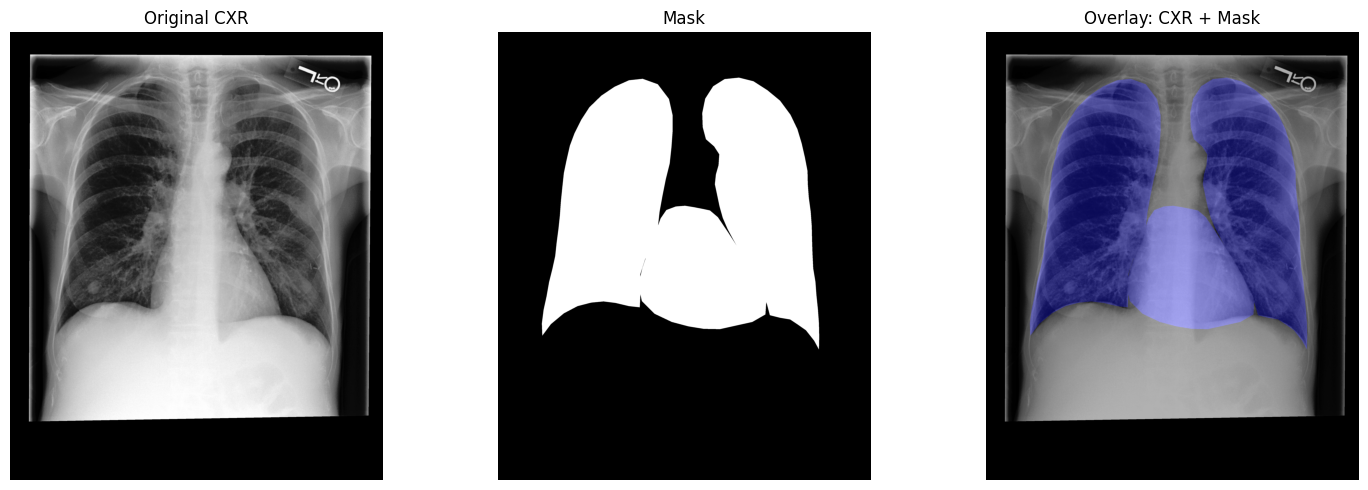

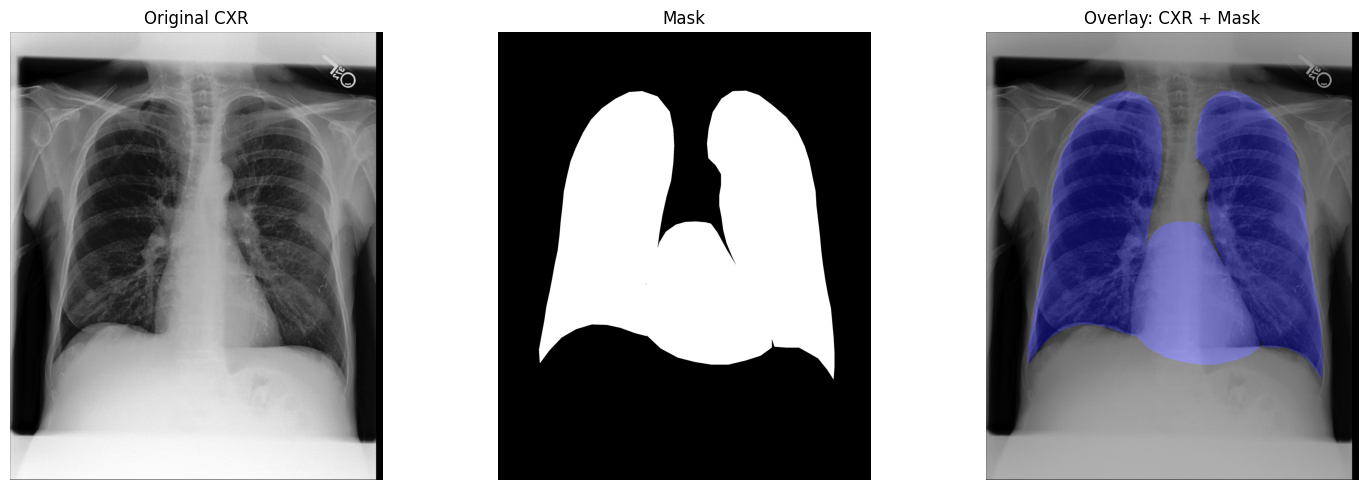

In [279]:
for idx, row in samples_meta_mask.iterrows():
    process_and_show(idx, samples_meta_mask)

In [ ]:
#--------------CheXmask Database ------------